In [1]:
import numpy as np
import cv2
import pickle
import pandas as pd
from keras_preprocessing.image import ImageDataGenerator
import os

In [2]:
x=pickle.load(open('C:\\Users\\Ayanabha\\Capstone\\Pickles\\x_nus_II.pkl','rb'))
y=pickle.load(open('C:\\Users\\Ayanabha\\Capstone\\Pickles\\y_nus_II.pkl','rb'))

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=250/len(x), random_state=42)

In [4]:
data={'id':X_train,'sign':y_train}
df1=pd.DataFrame(data)

In [5]:
data={'id':X_test,'sign':y_test}
df2=pd.DataFrame(data)

In [6]:
#Image augmentation on train data
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_dataframe(dataframe=df1,
                                        directory=None,
                                        x_col="id", y_col="sign",
                                        batch_size=16, seed=42,
                                        class_mode="categorical",
                                        target_size=(120,120))

Found 1750 validated image filenames belonging to 10 classes.


In [7]:
#Image augmentation on test data
test_datagen = ImageDataGenerator(rescale = 1./255)
testing_set = test_datagen.flow_from_dataframe(dataframe=df2,
                                        directory=None,
                                        x_col="id", y_col="sign",
                                        batch_size=16, seed=42,
                                        class_mode="categorical",
                                        target_size=(120,120))

Found 250 validated image filenames belonging to 10 classes.


In [8]:
import tensorflow as tf

In [13]:
init=tf.keras.initializers.he_uniform(seed=5)

In [23]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, kernel_initializer=init,
                               activation='relu', input_shape=[120, 120, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3,kernel_initializer=init, 
                               activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128,kernel_initializer=init,activation='relu'))
cnn.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [24]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [25]:
history=cnn.fit(x = training_set, validation_data = testing_set, epochs = 50)

Epoch 1/50
110/110 [==============================] - 7s 63ms/step - loss: 2.5593 - accuracy: 0.1411 - val_loss: 2.2348 - val_accuracy: 0.1440
Epoch 2/50
110/110 [==============================] - 7s 62ms/step - loss: 1.9279 - accuracy: 0.3589 - val_loss: 1.6221 - val_accuracy: 0.4600
Epoch 3/50
110/110 [==============================] - 7s 61ms/step - loss: 1.4221 - accuracy: 0.5229 - val_loss: 1.3396 - val_accuracy: 0.5560
Epoch 4/50
110/110 [==============================] - 7s 64ms/step - loss: 1.1018 - accuracy: 0.6286 - val_loss: 1.1111 - val_accuracy: 0.6120
Epoch 5/50
110/110 [==============================] - 7s 61ms/step - loss: 0.9479 - accuracy: 0.6903 - val_loss: 0.9733 - val_accuracy: 0.6560
Epoch 6/50
110/110 [==============================] - 7s 63ms/step - loss: 0.8043 - accuracy: 0.7360 - val_loss: 0.9259 - val_accuracy: 0.6720
Epoch 7/50
110/110 [==============================] - 7s 61ms/step - loss: 0.6511 - accuracy: 0.7834 - val_loss: 0.7987 - val_accuracy: 0.7360

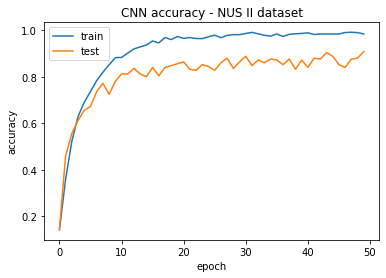

In [27]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN accuracy - NUS II dataset')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

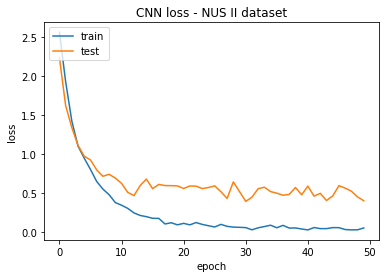

In [28]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN loss - NUS II dataset')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()